In [43]:
#importing necessary libraries
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #for feature engineering 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error # for␣evaluating ml models

**Dataset**

In [3]:
#loading the dataset
df=pd.read_csv(r"C:\Users\CHINNAMUTHU\Downloads/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#last 5 rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# checking the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# checking unique values
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
# checking duplicate values
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

In [9]:
# droping duplicate values
df.drop_duplicates(inplace=True)

In [10]:
# rows, columns
df.shape

(1337, 7)

In [11]:
#rows*columns
df.size

9359

**Exploratory Data Analysis**

Check for outliers

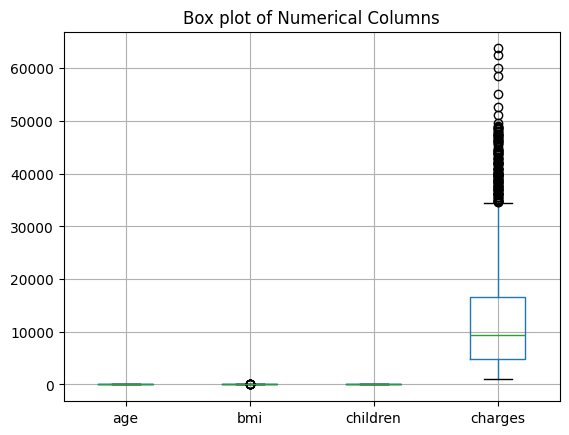

In [12]:
# Visualize box plots for numerical columns 
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

In [13]:
# Handling outliers
# Remove outliers based on a specific threshold
df_cleaned = df[(df['charges'] < 21000) & (df['bmi'] < 46)]

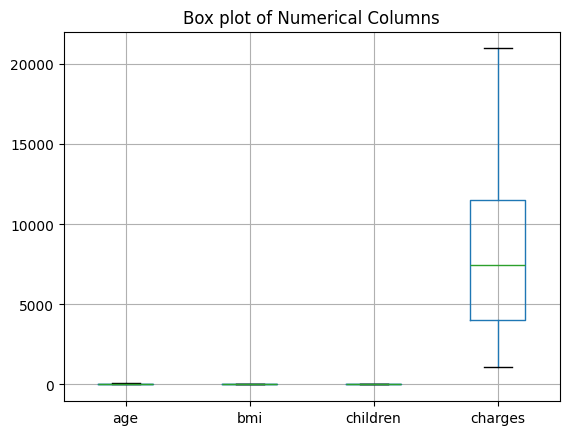

In [14]:
# visualize boxplot after removing outliers
df_cleaned.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

In [15]:
# Get summary statistics
df_cleaned.describe()

,age,bmi,children,charges
count,1068.000000,1068.000000,1068.000000,1068.000000
mean,38.371723,30.091910,1.076779,8159.150438
std,13.943164,5.856569,1.221375,4929.643963
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.840000,0.000000,4038.478863
50%,38.000000,29.830000,1.000000,7441.277000
75%,50.000000,33.933750,2.000000,11539.380487
max,64.000000,45.900000,5.000000,20984.093600


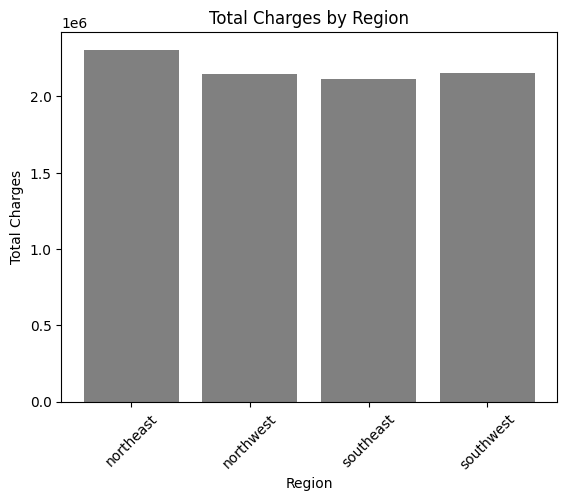

In [17]:
# Calculate the total charges by region
charges_by_region = df_cleaned.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='grey')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

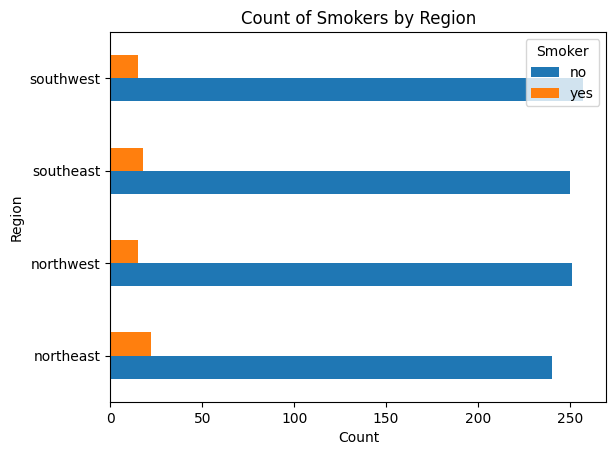

In [18]:
smokers_by_region = df_cleaned.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

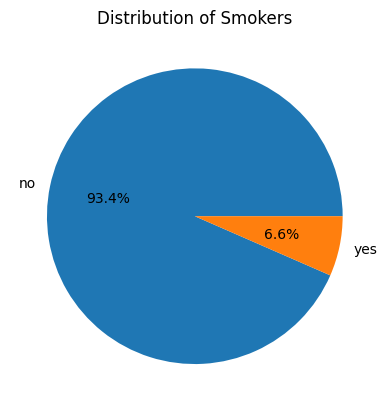

In [19]:
smoker_counts = df_cleaned['smoker'].value_counts() 
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%') 
plt.title('Distribution of Smokers')
plt.show()

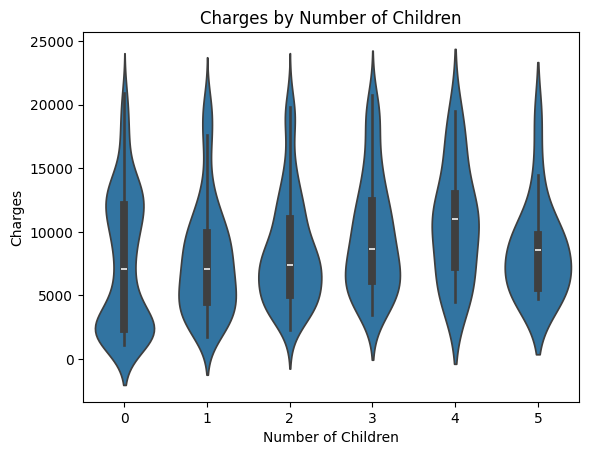

In [20]:
sns.violinplot(x=df_cleaned['children'], y=df_cleaned['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

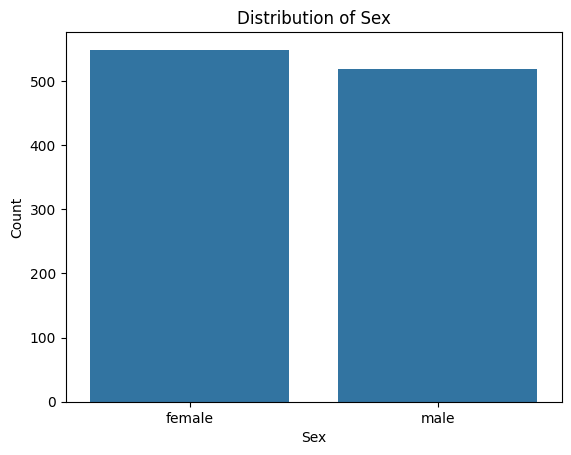

In [21]:
sns.countplot(x='sex', data=df_cleaned)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

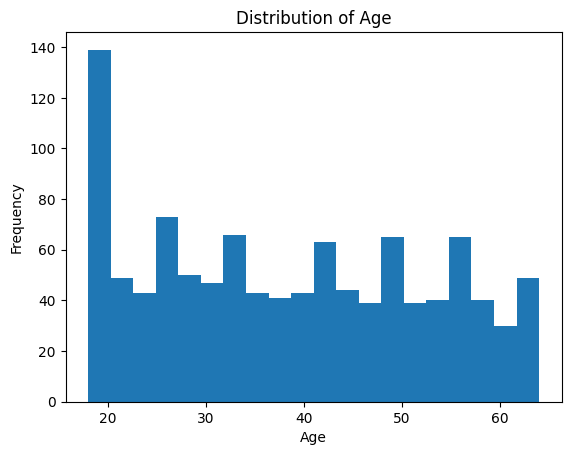

In [22]:
# distribution of age using histogram
df_cleaned['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

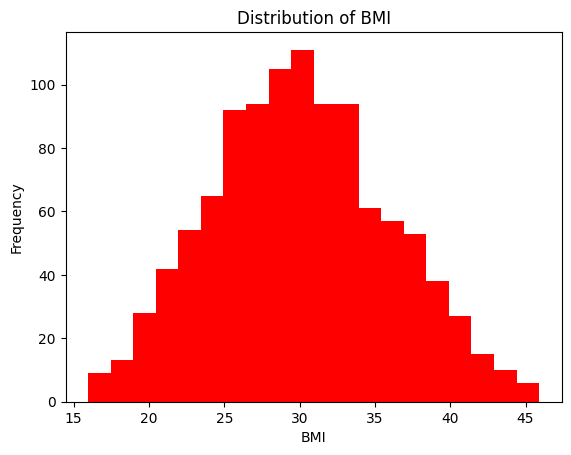

In [23]:
# distribution of BMI using histogram
df_cleaned['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

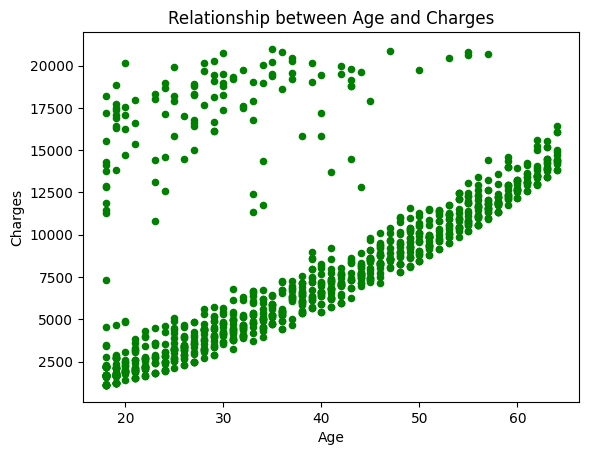

In [24]:
# relationship between age and charges using scatterplot
df_cleaned.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

There is a linearly increasing relationship between age and insurance charges. Older people are tend to be charged more

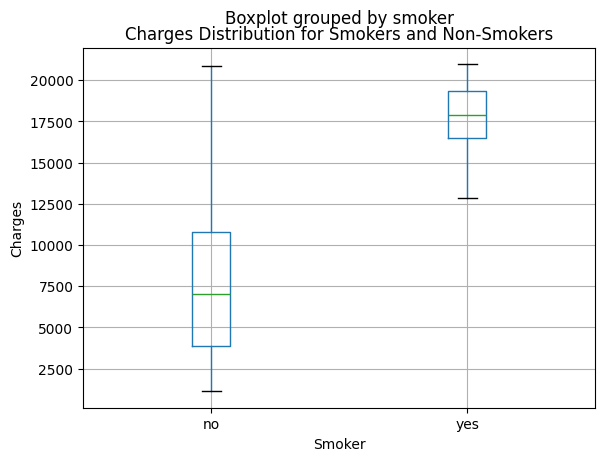

In [25]:
# charges distribution for smokers vs non-smokers using boxplot
df_cleaned.boxplot(column='charges', by='smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution for Smokers and Non-Smokers')
plt.show()

Unsurprisingly, smokers are charged way higher than non-smokers

**Feature Engineering**

Creating new feature such as Age groups

In [27]:
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df_cleaned.sample(5)

C:\Users\CHINNAMUTHU\AppData\Local\Temp\ipykernel_19012\3710811165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=[0, 25, 40, 60, df_cleaned['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])


,age,sex,bmi,children,smoker,region,charges,age_group
73,58,male,32.01,1,no,southeast,11946.6259,Middle-aged
808,18,male,30.14,0,no,southeast,1131.5066,Young
552,62,male,21.40,0,no,southwest,12957.1180,Senior
532,59,male,29.70,2,no,southeast,12925.8860,Middle-aged
534,64,male,40.48,0,no,southeast,13831.1152,Senior


**Feature encoding** - Handling categorical variables

One-hot encoding for the 'region' column

In [28]:
df_encoded = pd.get_dummies(df_cleaned, columns=['region'], prefix='region', dtype=int)
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest
79,41,female,32.965,0,no,6571.02435,Middle-aged,0,1,0,0
1107,50,female,26.220,2,no,10493.94580,Middle-aged,0,1,0,0
906,27,male,32.585,3,no,4846.92015,Adult,1,0,0,0
1,18,male,33.770,1,no,1725.55230,Young,0,0,1,0
1063,36,male,28.595,3,no,6548.19505,Adult,0,1,0,0


Label encoding for the 'smoker', 'sex' column

In [29]:
label_encoder = LabelEncoder()
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded
726,41,male,28.405,1,no,6664.68595,Middle-aged,0,1,0,0,0
412,26,female,17.195,2,yes,14455.64405,Adult,1,0,0,0,1
858,25,female,32.230,1,no,18218.16139,Young,0,0,1,0,0
754,24,male,33.630,4,no,17128.42608,Young,1,0,0,0,0
8,37,male,29.830,2,no,6406.41070,Adult,1,0,0,0,0


In [30]:
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])
df_encoded.sample(5)

,age,sex,bmi,children,smoker,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
1110,54,female,32.30,1,no,11512.4050,Middle-aged,1,0,0,0,0,0
1032,30,female,27.93,0,no,4137.5227,Adult,1,0,0,0,0,0
148,53,female,37.43,1,no,10959.6947,Middle-aged,0,1,0,0,0,0
555,28,male,23.80,2,no,3847.6740,Adult,0,0,0,1,0,1
22,18,male,34.10,0,no,1137.0110,Young,0,0,1,0,0,1


In [31]:
df_encoded = df_encoded[[x for x in df_encoded.columns if x not in ['smoker', 'sex']]]
df_encoded.sample(5)

,age,bmi,children,charges,age_group,region_northeast,region_northwest,region_southeast,region_southwest,smoker_encoded,sex_encoded
170,63,41.47,0,13405.3903,Senior,0,0,1,0,0,1
136,19,34.10,0,1261.4420,Young,0,0,0,1,0,1
54,40,28.69,3,8059.6791,Adult,0,1,0,0,0,0
1017,26,34.20,2,3987.9260,Adult,0,0,0,1,0,0
300,36,27.55,3,6746.7425,Adult,1,0,0,0,0,1


**Correlation Analysis**

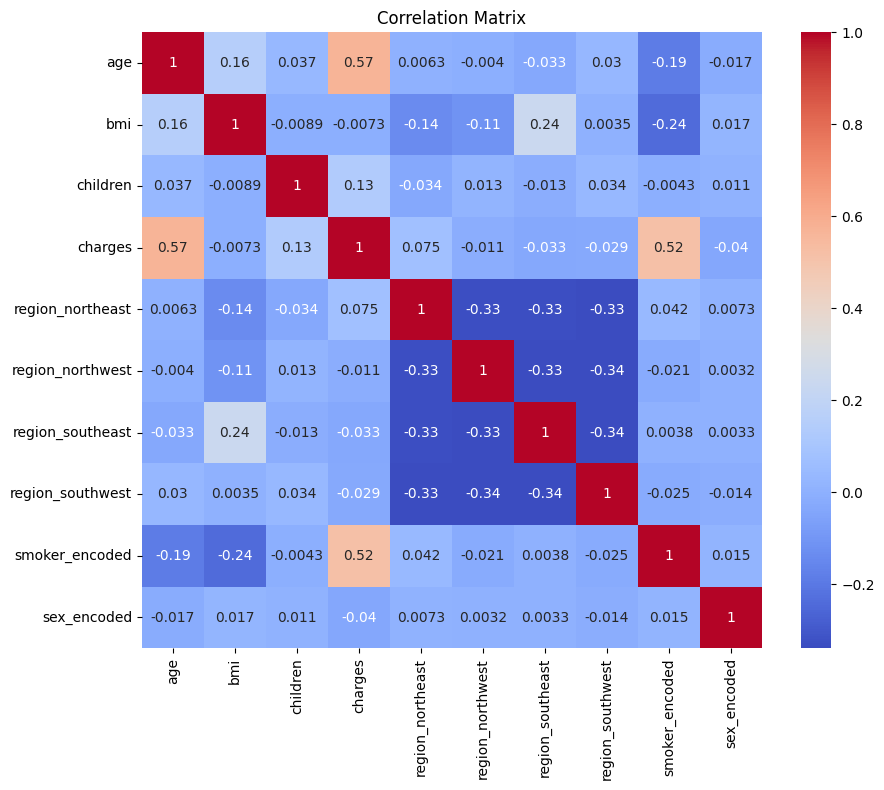

Relevant features based on correlation:
['age', 'smoker_encoded']


In [32]:
numr_cols = [x for x in df_encoded.columns if x not in ['age_group']]
corr_matrix = df_encoded[numr_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm") 
plt.title("Correlation Matrix")
plt.show()

# Identify relevant features based on correlation
threshold = 0.3
relevant_features = corr_matrix[(corr_matrix['charges'].abs() > threshold) & (corr_matrix.index != 'charges')].index.tolist() 
print("Relevant features based on correlation:") 
print(relevant_features)

Only age and smoking turned out to be relevant feature based on correlation analysis

**Modelling**

In [33]:
# Select the relevant features
X = df_encoded[['age', 'smoker_encoded']]
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

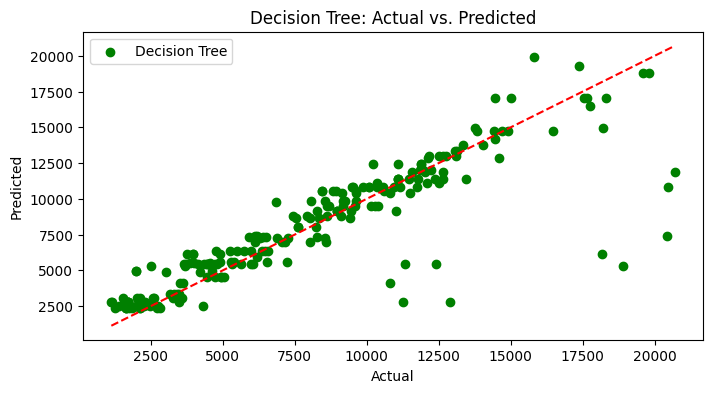

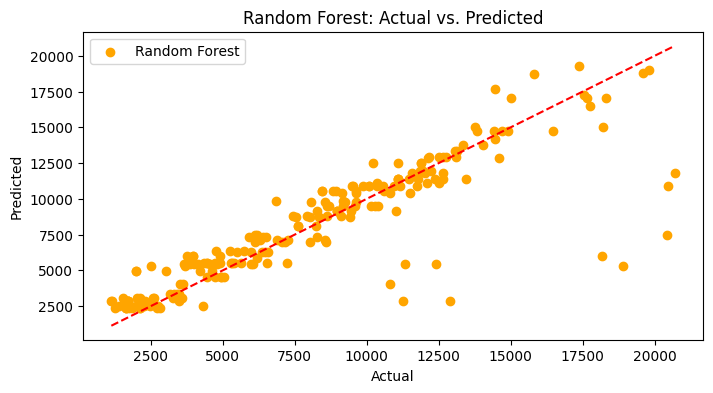

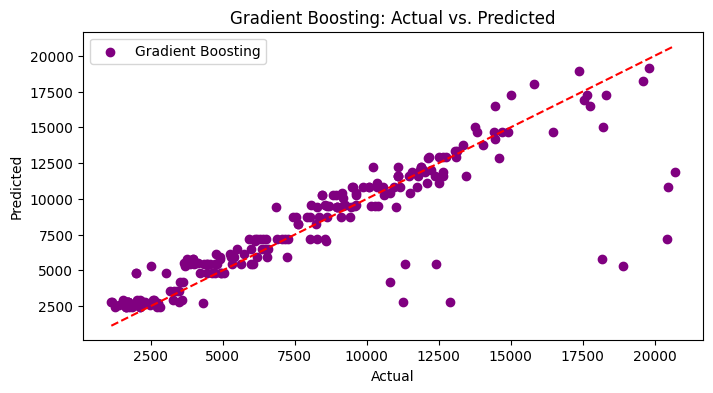

In [34]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, dt_predictions, color='green', label='Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Decision Tree: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(8, 4))
plt.scatter(y_test, rf_predictions, color='orange', label='Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

# Plot actual vs. predicted values for Gradient Boosting
plt.figure(figsize=(8, 4))
plt.scatter(y_test, gb_predictions, color='purple', label='Gradient Boosting')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Gradient Boosting: Actual vs. Predicted') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [35]:
# Print the evaluation metrics
print("Decision Tree - MSE: ", dt_mse)
print("Decision Tree - MAE: ", dt_mae)
print("Random Forest - MSE: ", rf_mse)
print("Random Forest - MAE: ", rf_mae)
print("Gradient Boosting - MSE: ", gb_mse)
print("Gradient Boosting - MAE: ", gb_mae)

Decision Tree - MSE:  5728632.311218643
Decision Tree - MAE:  1275.0243094744608
Random Forest - MSE:  5715236.699665957
Random Forest - MAE:  1271.6091172014353
Gradient Boosting - MSE:  5620075.226137549
Gradient Boosting - MAE:  1234.9739469039018


**Feature Importance**

In [37]:
# Decision Tree
print("Decision Tree:")

# Feature importances
importance = dt_model.feature_importances_ 

for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}") 

print()

# Random Forest
print("Random Forest:")

# Feature importances
importance = rf_model.feature_importances_

for i, feature in enumerate(X.columns): 
    print(f"{feature}: {importance[i]}")

print()

# Gradient Boosting
print("Gradient Boosting:")

# Feature importances
importance = gb_model.feature_importances_ 
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

Decision Tree:
age: 0.6283321204573397
smoker_encoded: 0.3716678795426604

Random Forest:
age: 0.6138086171179801
smoker_encoded: 0.38619138288201993

Gradient Boosting:
age: 0.6199252235871211
smoker_encoded: 0.38007477641287885


Age has higher importance than smoking in all three models.

**Inference on sample data**

In [38]:
# Example input for prediction
new_data = pd.DataFrame({'age': [30], 'smoker_encoded': [1]})

# Decision Tree
dt_predictions = dt_model.predict(new_data)
print("Decision Tree Predictions:", dt_predictions)

# Random Forest
rf_predictions = rf_model.predict(new_data)
print("Random Forest Predictions:", rf_predictions)

# Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Decision Tree Predictions: [19323.2621875]
Random Forest Predictions: [19280.96631903]
Gradient Boosting Predictions: [18919.38558574]


In [39]:
# Example input for prediction
new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [0]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [6169.09883742]


In [40]:
# Example input for prediction
new_data = pd.DataFrame({'age': [35], 'smoker_encoded': [1]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [19735.06590245]


In [41]:
# Example input for prediction
new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [0]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [14685.8553561]


In [42]:
# Example input for prediction
new_data = pd.DataFrame({'age': [67], 'smoker_encoded': [1]}) # Gradient Boosting
gb_predictions = gb_model.predict(new_data)
print("Gradient Boosting Predictions:", gb_predictions)

Gradient Boosting Predictions: [19151.9711604]
